Found 96 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


C:\Users\ansar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 44s 13s/step - accuracy: 0.5365 - loss: 9.2994 - val_accuracy: 0.5000 - val_loss: 9.2807
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 39s 13s/step - accuracy: 0.5312 - loss: 9.3409 - val_accuracy: 0.5000 - val_loss: 9.2450
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 14s/step - accuracy: 0.5859 - loss: 9.2463 - val_accuracy: 0.5000 - val_loss: 9.2222
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 45s 15s/step - accuracy: 0.4297 - loss: 9.3925 - val_accuracy: 0.5417 - val_loss: 9.2075
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 46s 16s/step - accuracy: 0.5026 - loss: 9.2378 - val_accuracy: 0.5833 - val_loss: 9.2118
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 40s 13s/step - accuracy: 0.5182 - loss: 9.2539 - val_accuracy: 0.4167 - val_loss: 9.2098
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 14s/step - accuracy: 0.5521 - loss: 9.1956 - val_accuracy: 0.4583 - val_loss: 9.2096
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 45s 15s/step - accuracy: 0.5794 - loss: 9.1694 - val_accuracy: 0.5000 - val_loss: 9.1924


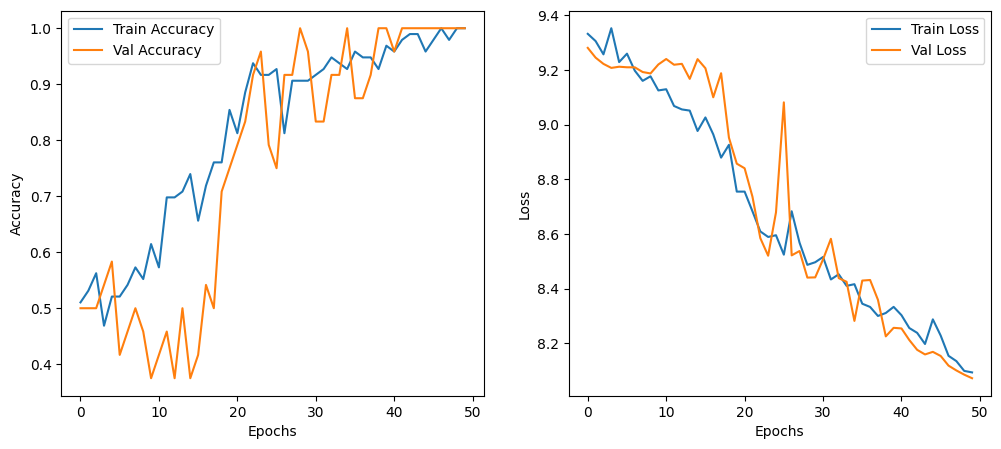

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.applications import VGG16
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2  # Import OpenCV for noise reduction

# Dataset Preprocessing

# Define dataset path
dataset_path = "fire_data/fire_dataset"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Function for Noise Reduction
def reduce_noise(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

# Data Augmentation & Normalization
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=reduce_noise  # Apply noise reduction
)

# Load Training and Validation Data
train_ds = train_datagen.flow_from_directory(
    dataset_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
    subset="training", class_mode="sparse"
)

val_ds = train_datagen.flow_from_directory(
    dataset_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
    subset="validation", class_mode="sparse"
)

# CNN Model

# Load VGG16 as feature extractor (without top layers)
base_model = VGG16(input_shape=(224, 224, 3), include_top=False, weights="imagenet")

# Unfreeze deeper layers for fine-tuning
for layer in base_model.layers[-10:]:  
    layer.trainable = True 

cnn_layers = keras.Sequential([
    layers.Conv2D(64, (3,3), strides=(2,2), activation='relu', padding='same'),  # Stride of 2
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), strides=(2,2), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
])

# Define the full model
model = keras.Sequential([
    base_model,  # Use VGG16 pretrained model
    cnn_layers,  # Custom CNN 
    layers.GlobalAveragePooling2D(),
    
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),

    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.4),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(2, activation='softmax')  # 2 classes: Fire, Non-Fire
])

# Compile Model
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train Model
EPOCHS = 50
history = model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS)

# Save & Evaluate Model
model.save("fire_detection_vgg16_finetuned.keras")

loss, accuracy = model.evaluate(val_ds)
print(f"✅ Improved Validation Accuracy: {accuracy:.4f}")

# Plot Accuracy & Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Found 36 images belonging to 2 classes.


C:\Users\ansar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 8.0890
📉 Updated Validation Loss: 8.0890
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step

🔹 **Updated Evaluation Metrics (More Images):**
🎯 Precision: 1.0000
🔥 Recall (Sensitivity): 1.0000
📊 F1-Score: 1.0000
📈 ROC-AUC Score: 1.0000


C:\Users\ansar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


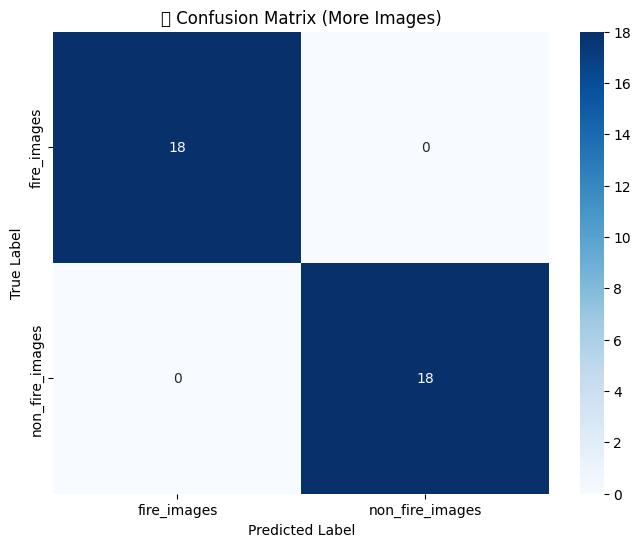

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
import seaborn as sns


model = keras.models.load_model("fire_detection_vgg16_finetuned.keras")

dataset_path = "fire_data/fire_dataset"
IMG_SIZE = (224, 224)
BATCH_SIZE = 128  

val_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, validation_split=0.3 
)

val_ds = val_datagen.flow_from_directory(
    dataset_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
    subset="validation", class_mode="sparse", shuffle=False
)

loss, accuracy = model.evaluate(val_ds)
print(f"📉 Updated Validation Loss: {loss:.4f}")


y_true = val_ds.classes  # Actual labels
y_pred_probs = model.predict(val_ds, verbose=1)  # Predict on full dataset
y_pred = np.argmax(y_pred_probs, axis=1) 

precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
roc_auc = roc_auc_score(y_true, y_pred_probs[:, 1])  # Binary classification


print("\n🔹 **Updated Evaluation Metrics (More Images):**")
print(f"🎯 Precision: {precision:.4f}")
print(f"🔥 Recall (Sensitivity): {recall:.4f}")
print(f"📊 F1-Score: {f1:.4f}")
print(f"📈 ROC-AUC Score: {roc_auc:.4f}")


cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=val_ds.class_indices.keys(), yticklabels=val_ds.class_indices.keys())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("🔥 Confusion Matrix (More Images)")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 907ms/step


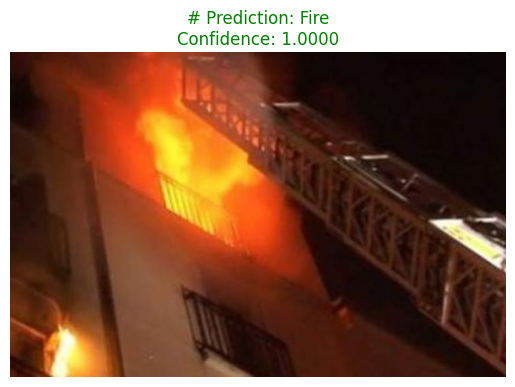

In [1]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow import keras

# Load Trained Model
model = keras.models.load_model("fire_detection_vgg16_finetuned.keras")

# Define Class Labels
class_names = ["Fire", "Non-Fire"]

# Function to Test a Single Image and Display Output Below
def predict_fire(image_path):
    IMG_SIZE = (224, 224)  # Model input size
    image = cv2.imread(image_path)  # Read image
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display
    image_resized = cv2.resize(image_rgb, IMG_SIZE)  # Resize image for model
    image_normalized = image_resized / 255.0  # Normalize pixel values
    image_input = np.expand_dims(image_normalized, axis=0)  # Expand dims for model input

    # Predict Fire or Non-Fire
    prediction = model.predict(image_input)
    predicted_class = np.argmax(prediction)  # Get class with highest probability
    confidence = np.max(prediction)  # Get confidence score

    # Display Image with Prediction Below
    plt.imshow(image_rgb)  # Show the image
    plt.axis("off")  # Hide axes
    plt.title(f"# Prediction: {class_names[predicted_class]}\nConfidence: {confidence:.4f}", fontsize=12, color="red" if predicted_class == 1 else "green")
    plt.show()

# Example: Test on a Fire Image
predict_fire("fire_data/fire_dataset/fire_images/fire.18.png")  # Change to your test image path



C:\Users\ansar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(
C:\Users\ansar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\ansar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13

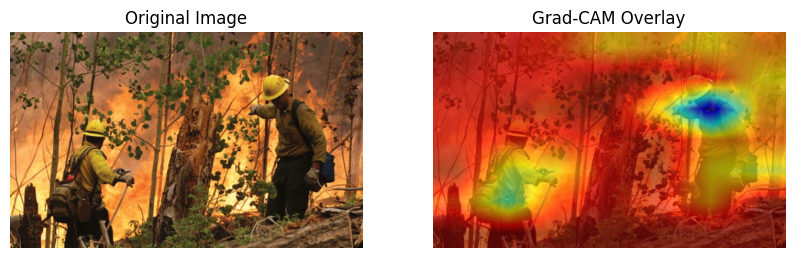

In [2]:
import cv2
import numpy as np
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torchvision import models

# ==========================
# Load Pretrained Model (VGG16)
# ==========================
model = models.vgg16(pretrained=True)
model.eval()  # Set model to evaluation mode

# Select last Conv2D layer for Grad-CAM
last_conv_layer = model.features[-1]  # Last conv layer in VGG16

# ==========================
# Grad-CAM Function
# ==========================
def generate_gradcam(image_path, model, last_conv_layer, class_index=None, alpha=0.4):
    IMG_SIZE = (224, 224)

    # Load & preprocess image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize(IMG_SIZE),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    input_tensor = transform(image_rgb).unsqueeze(0)  # Add batch dimension
    input_tensor.requires_grad = True  # Enable gradients for Grad-CAM

    # Forward pass
    activations = {}
    gradients = {}

    def forward_hook(module, input, output):
        activations["value"] = output

    def backward_hook(module, grad_input, grad_output):
        gradients["value"] = grad_output[0]

    # Register hooks
    handle_forward = last_conv_layer.register_forward_hook(forward_hook)
    handle_backward = last_conv_layer.register_backward_hook(backward_hook)

    # Get predictions
    output = model(input_tensor)
    class_index = class_index if class_index is not None else output.argmax().item()
    loss = output[0, class_index]

    # Backpropagation
    model.zero_grad()
    loss.backward()

    # Remove hooks
    handle_forward.remove()
    handle_backward.remove()

    # Compute Grad-CAM heatmap
    pooled_grads = torch.mean(gradients["value"], dim=[0, 2, 3])
    activations = activations["value"].squeeze(0).detach()
    for i in range(activations.shape[0]):
        activations[i] *= pooled_grads[i]
    
    heatmap = activations.mean(dim=0).numpy()
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap) if np.max(heatmap) != 0 else 1
    heatmap = cv2.resize(heatmap, (image.shape[1], image.shape[0]))
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)

    # Overlay heatmap on original image
    overlay_image = cv2.addWeighted(image_rgb, alpha, heatmap_colored, 1 - alpha, 0)

    # Display results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.axis("off")
    plt.title("Original Image")

    plt.subplot(1, 2, 2)
    plt.imshow(overlay_image)
    plt.axis("off")
    plt.title("Grad-CAM Overlay")

    plt.show()

# ==========================
# Run Grad-CAM
# ==========================
generate_gradcam("fire_data/fire_dataset/fire_images/fire.17.png", model, last_conv_layer)



Found 24 images belonging to 2 classes.


C:\Users\ansar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


C:\Users\ansar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


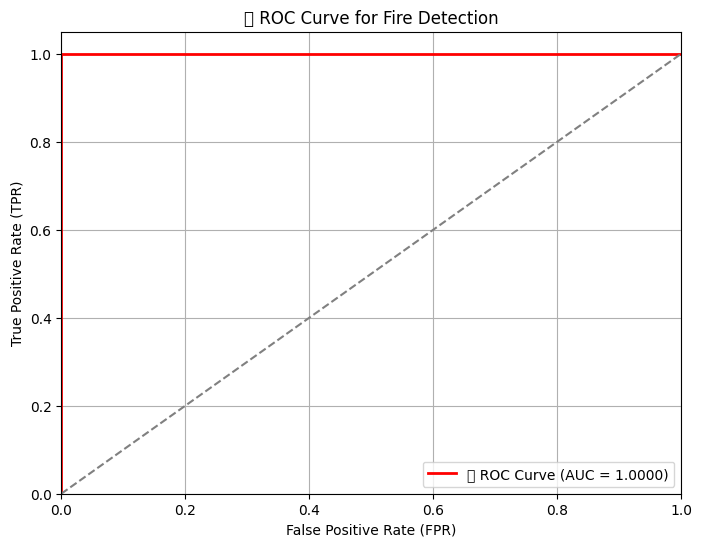

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import seaborn as sns

# ==========================
# Load the Trained Model
# ==========================
model = keras.models.load_model("fire_detection_vgg16_finetuned.keras")

# ==========================
# Load the Validation Dataset
# ==========================
dataset_path = "fire_data/fire_dataset"
IMG_SIZE = (224, 224)
BATCH_SIZE = 64  

val_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2)

val_ds = val_datagen.flow_from_directory(
    dataset_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
    subset="validation", class_mode="sparse", shuffle=False
)

# ==========================
# Generate Predictions
# ==========================
y_true = val_ds.classes  # Actual labels (0 = Non-Fire, 1 = Fire)
y_pred_probs = model.predict(val_ds, verbose=1)  # Predicted probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# ==========================
# Compute AUC & ROC Curve
# ==========================
fpr, tpr, _ = roc_curve(y_true, y_pred_probs[:, 1])  # Get False Positive Rate & True Positive Rate
roc_auc = auc(fpr, tpr)  # Compute AUC Score

# ==========================
# Plot ROC Curve
# ==========================
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'🔥 ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("🔥 ROC Curve for Fire Detection")
plt.legend(loc="lower right")
plt.grid()
plt.show()
